In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time

from sklearn.model_selection import train_test_split #needed for spliting data into testing and training
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
df_LG = pd.read_csv(r"D:\Notebook\LG.csv")
df_LL = pd.read_csv(r"D:\Notebook\LL.csv")
df_LLG=pd.read_csv(r"D:\Notebook\LLG.csv")
df_LLL = pd.read_csv(r"D:\Notebook\LLL_fault.csv")

df = pd.concat([df_LG, df_LL, df_LLG, df_LLL],ignore_index=True,axis=0) # ignore_index=True,
print(df)

data=np.array(df)
X=data[:,1:4]
y=data[:,4]

      test_data       I_a       I_b       I_c  Fault_Type
0             1  2.789859  0.000000  0.000000         2.0
1             2  2.794565  0.000000  0.000000         2.0
2             3  2.795167  0.000000  0.000000         2.0
3             4  2.795763  0.000000  0.000000         2.0
4             5  2.788781  0.000000  0.000000         2.0
...         ...       ...       ...       ...         ...
3995        996  2.650179  2.650179  2.650179         0.0
3996        997  2.649544  2.649544  2.649544         0.0
3997        998  2.645722  2.645722  2.645722         0.0
3998        999  2.643605  2.643605  2.643605         0.0
3999       1000  2.649951  2.649951  2.649951         0.0

[4000 rows x 5 columns]


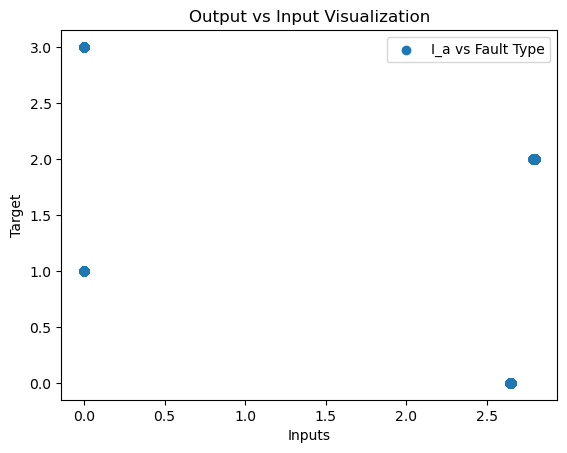

In [6]:
#Step 1: Understanding the Data

# Scatter plot of the inputs vs target
plt.scatter(X[:, 0], y, label='I_a vs Fault Type')
#plt.scatter(X[:, 1], y, label='I_b vs Fault Type')
#plt.scatter(X[:, 2], y, label='I_c vs Fault Type')

plt.xlabel('Inputs')
plt.ylabel('Target')
plt.legend()
plt.title('Output vs Input Visualization')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
#print("Train data are:")
#print(X_train)
#print(y_train)

#Normalizing the Input
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:

t = time.process_time() 
lr = LogisticRegression().fit(X_train_scaled, y_train) #for MLR
#training_time = time.process_time() - t
print(f"Training Time =",time.process_time() - t)


print("Training Accuracy =" ,accuracy_score(y_train, lr.predict(X_train_scaled)))
print("Training Precision =", precision_score(y_train, lr.predict(X_train_scaled), average='micro'))
print("Training Recall =", recall_score(y_train, lr.predict(X_train_scaled), average='micro'))
print("Training F1 Score =", f1_score(y_train, lr.predict(X_train_scaled), average='micro'))


y_pred=lr.predict(X_test_scaled)
y_pred=np.array(y_pred)

t = time.process_time() 
lr = LogisticRegression().fit(X_test_scaled, y_test) #for MLR
#training_time = time.process_time() - t
print("Testing Time =",time.process_time() - t)
print("Testing Accuracy =" ,accuracy_score(y_test, lr.predict(X_test_scaled)))
print("Testing Precision =", precision_score(y_test, lr.predict(X_test_scaled), average='micro'))
print("Testing Recall =", recall_score(y_test, lr.predict(X_test_scaled), average='micro'))
print("Testing F1 Score =", f1_score(y_test, lr.predict(X_test_scaled), average='micro'))

Training Time = 0.015625
Training Accuracy = 1.0
Training Precision = 1.0
Training Recall = 1.0
Training F1 Score = 1.0
Testing Time = 0.015625
Testing Accuracy = 1.0
Testing Precision = 1.0
Testing Recall = 1.0
Testing F1 Score = 1.0


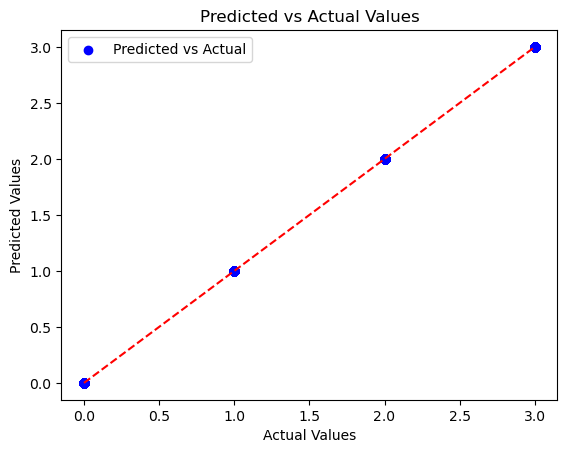

In [9]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [11]:

t = time.process_time() 
lr = svm.SVC().fit(X_train_scaled, y_train) #for MLR
#training_time = time.process_time() - t
print(f"Training Time =",time.process_time() - t)


print("Training Accuracy =" ,accuracy_score(y_train, lr.predict(X_train_scaled)))
print("Training Precision =", precision_score(y_train, lr.predict(X_train_scaled), average='micro'))
print("Training Recall =", recall_score(y_train, lr.predict(X_train_scaled), average='micro'))
print("Training F1 Score =", f1_score(y_train, lr.predict(X_train_scaled), average='micro'))


y_pred=lr.predict(X_test_scaled)
y_pred=np.array(y_pred)

t = time.process_time() 
lr = svm.SVC().fit(X_test_scaled, y_test) #for MLR
#training_time = time.process_time() - t
print("Testing Time =",time.process_time() - t)
print("Testing Accuracy =" ,accuracy_score(y_test, lr.predict(X_test_scaled)))
print("Testing Precision =", precision_score(y_test, lr.predict(X_test_scaled), average='micro'))
print("Testing Recall =", recall_score(y_test, lr.predict(X_test_scaled), average='micro'))
print("Testing F1 Score =", f1_score(y_test, lr.predict(X_test_scaled), average='micro'))

Training Time = 0.015625
Training Accuracy = 1.0
Training Precision = 1.0
Training Recall = 1.0
Training F1 Score = 1.0
Testing Time = 0.0
Testing Accuracy = 1.0
Testing Precision = 1.0
Testing Recall = 1.0
Testing F1 Score = 1.0


In [12]:

t = time.process_time() 
lr = tree.DecisionTreeClassifier().fit(X_train_scaled, y_train) #for MLR
#training_time = time.process_time() - t
print(f"Training Time =",time.process_time() - t)


print("Training Accuracy =" ,accuracy_score(y_train, lr.predict(X_train_scaled)))
print("Training Precision =", precision_score(y_train, lr.predict(X_train_scaled), average='micro'))
print("Training Recall =", recall_score(y_train, lr.predict(X_train_scaled), average='micro'))
print("Training F1 Score =", f1_score(y_train, lr.predict(X_train_scaled), average='micro'))


y_pred=lr.predict(X_test_scaled)
y_pred=np.array(y_pred)

t = time.process_time() 
lr = tree.DecisionTreeClassifier().fit(X_test_scaled, y_test) #for MLR
#training_time = time.process_time() - t
print("Testing Time =",time.process_time() - t)
print("Testing Accuracy =" ,accuracy_score(y_test, lr.predict(X_test_scaled)))
print("Testing Precision =", precision_score(y_test, lr.predict(X_test_scaled), average='micro'))
print("Testing Recall =", recall_score(y_test, lr.predict(X_test_scaled), average='micro'))
print("Testing F1 Score =", f1_score(y_test, lr.predict(X_test_scaled), average='micro'))

Training Time = 0.03125
Training Accuracy = 1.0
Training Precision = 1.0
Training Recall = 1.0
Training F1 Score = 1.0
Testing Time = 0.0
Testing Accuracy = 1.0
Testing Precision = 1.0
Testing Recall = 1.0
Testing F1 Score = 1.0


In [13]:
t = time.process_time() 
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42) # Create an ANN model
ann.fit(X_train_scaled, y_train)  # Fit the model
training_time = time.process_time() - t  # Calculate training time
print(f"Training Time = {training_time}")

# Calculate training metrics
train_accuracy = accuracy_score(y_train, ann.predict(X_train_scaled))
train_precision = precision_score(y_train, ann.predict(X_train_scaled), average='micro')
train_recall = recall_score(y_train, ann.predict(X_train_scaled), average='micro')
train_f1 = f1_score(y_train, ann.predict(X_train_scaled), average='micro')

print(f"Training Accuracy = {train_accuracy}")
print(f"Training Precision = {train_precision}")
print(f"Training Recall = {train_recall}")
print(f"Training F1 Score = {train_f1}")

# Testing phase
t = time.process_time() 
y_pred = ann.predict(X_test_scaled)  # Predict on the test set
testing_time = time.process_time() - t  # Calculate testing time
print(f"Testing Time = {testing_time}")

# Calculate testing metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='micro')
test_recall = recall_score(y_test, y_pred, average='micro')
test_f1 = f1_score(y_test, y_pred, average='micro')

print(f"Testing Accuracy = {test_accuracy}")
print(f"Testing Precision = {test_precision}")
print(f"Testing Recall = {test_recall}")
print(f"Testing F1 Score = {test_f1}")

Training Time = 0.546875
Training Accuracy = 1.0
Training Precision = 1.0
Training Recall = 1.0
Training F1 Score = 1.0
Testing Time = 0.0
Testing Accuracy = 1.0
Testing Precision = 1.0
Testing Recall = 1.0
Testing F1 Score = 1.0


In [14]:

# Training phase
t = time.process_time() 
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Create a Random Forest model
rf.fit(X_train_scaled, y_train)  # Fit the model
training_time = time.process_time() - t  # Calculate training time
print(f"Training Time = {training_time}")

# Calculate training metrics
train_accuracy = accuracy_score(y_train, rf.predict(X_train_scaled))
train_precision = precision_score(y_train, rf.predict(X_train_scaled), average='micro')
train_recall = recall_score(y_train, rf.predict(X_train_scaled), average='micro')
train_f1 = f1_score(y_train, rf.predict(X_train_scaled), average='micro')

print(f"Training Accuracy = {train_accuracy}")
print(f"Training Precision = {train_precision}")
print(f"Training Recall = {train_recall}")
print(f"Training F1 Score = {train_f1}")

# Testing phase
t = time.process_time() 
y_pred = rf.predict(X_test_scaled)  # Predict on the test set
testing_time = time.process_time() - t  # Calculate testing time
print(f"Testing Time = {testing_time}")

# Calculate testing metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='micro')
test_recall = recall_score(y_test, y_pred, average='micro')
test_f1 = f1_score(y_test, y_pred, average='micro')

print(f"Testing Accuracy = {test_accuracy}")
print(f"Testing Precision = {test_precision}")
print(f"Testing Recall = {test_recall}")
print(f"Testing F1 Score = {test_f1}")


Training Time = 0.25
Training Accuracy = 1.0
Training Precision = 1.0
Training Recall = 1.0
Training F1 Score = 1.0
Testing Time = 0.03125
Testing Accuracy = 1.0
Testing Precision = 1.0
Testing Recall = 1.0
Testing F1 Score = 1.0


In [15]:
# Training phase
t = time.process_time() 
xgb = XGBClassifier(n_estimators=100, random_state=42)  # Create an XGBoost model
xgb.fit(X_train_scaled, y_train)  # Fit the model
training_time = time.process_time() - t  # Calculate training time
print(f"Training Time = {training_time}")

# Calculate training metrics
train_accuracy = accuracy_score(y_train, xgb.predict(X_train_scaled))
train_precision = precision_score(y_train, xgb.predict(X_train_scaled), average='micro')
train_recall = recall_score(y_train, xgb.predict(X_train_scaled), average='micro')
train_f1 = f1_score(y_train, xgb.predict(X_train_scaled), average='micro')

print(f"Training Accuracy = {train_accuracy}")
print(f"Training Precision = {train_precision}")
print(f"Training Recall = {train_recall}")
print(f"Training F1 Score = {train_f1}")

# Testing phase
t = time.process_time() 
y_pred = xgb.predict(X_test_scaled)  # Predict on the test set
testing_time = time.process_time() - t  # Calculate testing time
print(f"Testing Time = {testing_time}")

# Calculate testing metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='micro')
test_recall = recall_score(y_test, y_pred, average='micro')
test_f1 = f1_score(y_test, y_pred, average='micro')

print(f"Testing Accuracy = {test_accuracy}")
print(f"Testing Precision = {test_precision}")
print(f"Testing Recall = {test_recall}")
print(f"Testing F1 Score = {test_f1}")

Training Time = 1.4375
Training Accuracy = 0.9990625
Training Precision = 0.9990625
Training Recall = 0.9990625
Training F1 Score = 0.9990625
Testing Time = 0.015625
Testing Accuracy = 1.0
Testing Precision = 1.0
Testing Recall = 1.0
Testing F1 Score = 1.0
